## Manual use of remFORC data to estimate paleointensity

This notebook will calculate a paleointensity estimate for a sample by modelling its behaviour during TRM acqusition using a FORC diagram. The simulated model is then combined with the measured AF demagnetization spectras of NRM, ARM and SIRM for the given sample, and this will provide an estimate for the paleointensity and error margins. Estimates and plots are automatically saved.

In [1]:
# import of functions needed to run the notebook

import Manual_NRF_functions as pf
import time
import threading

 The cell below will ask you for the name of the sample to test, and search within the current directory for the FORC data (samplename.frc) file, the NRM AF demagnetisation data (samplename.nrm, ARM AF demagnetisation data (samplename.arm) and the the SIRM AF demagnetisation data (samplename.sirm) files. AF demagnetsation data should be in generic Magic format. 
 
 In this section you will be asked for an expected field intensity range, the cooling time during TRM acquisition and the Curie temperature of the main magnetic carrier. 
 
 You will also be shown the zdjerveld plot for the data and be asked to input the AF step where the primary magnetisation component begins. If you canot identify the primary componant with the three projections included we suggest you use a more suitable program to determine the AF step. 


Please enter the sample name: hc6q
Sample to test: hc6q.genFORC
The standard field bounds are 10 μT to 50 μT, if you want to keep these enter K, else enter any other charactor:K
Input Curie temperature in °C: 500


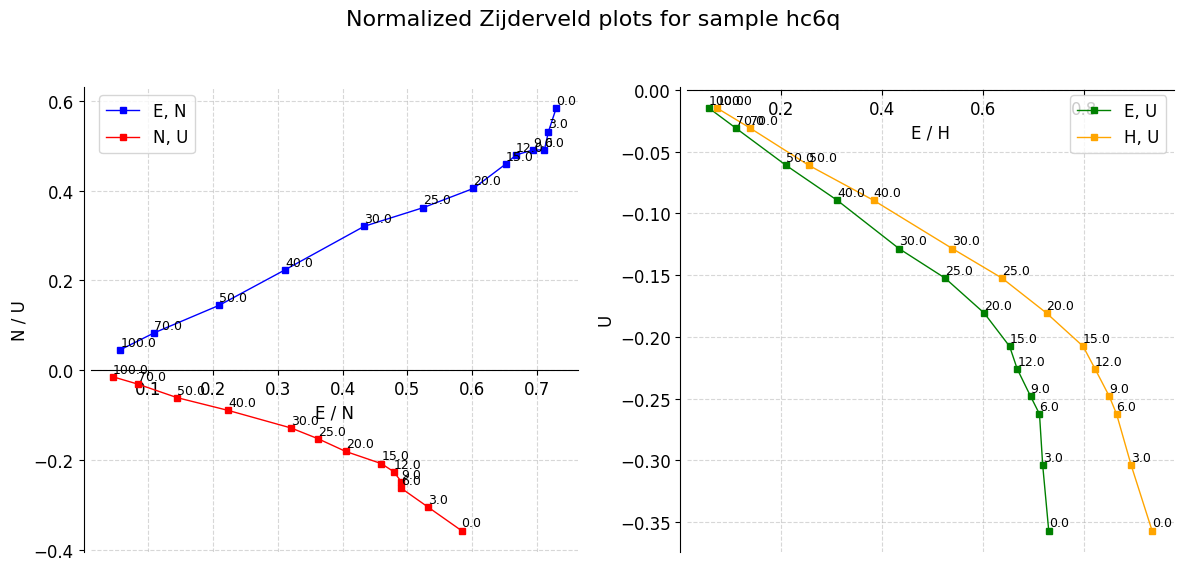

Pick the AF demag step where the primary component is identified: 12
Selected AF step: 12


In [2]:
if ('X' in locals()) == False: # dictionary to holds the data
    X = {}
V = {} # to hold the simulation
X = pf.find_files(X) # reads in your file
X = pf.demag_data_generic_arm(X) # processes demag data and stores
X = pf.proccess_all(X) # processes forc data and stores
X = pf.prod_FORCs(X) # preps data for forc distribution
X = pf.plot_zplot(X) # plots zijderfeld plots

This cell will calculate the full width at half maximum to determine the FORC distribution at smoothing factor zero for the model. It will ask you to check there are no noisy FORC diagrams giving unreaslitic FWHMs - if a point on the best fit graph lies far from the line of best fit, you should remove it. The right hand plot should be a straight line with a slight positive gradient. You can remove anamolous plots, and select the smallest SF which gives reliable data and this will be plotted below.  

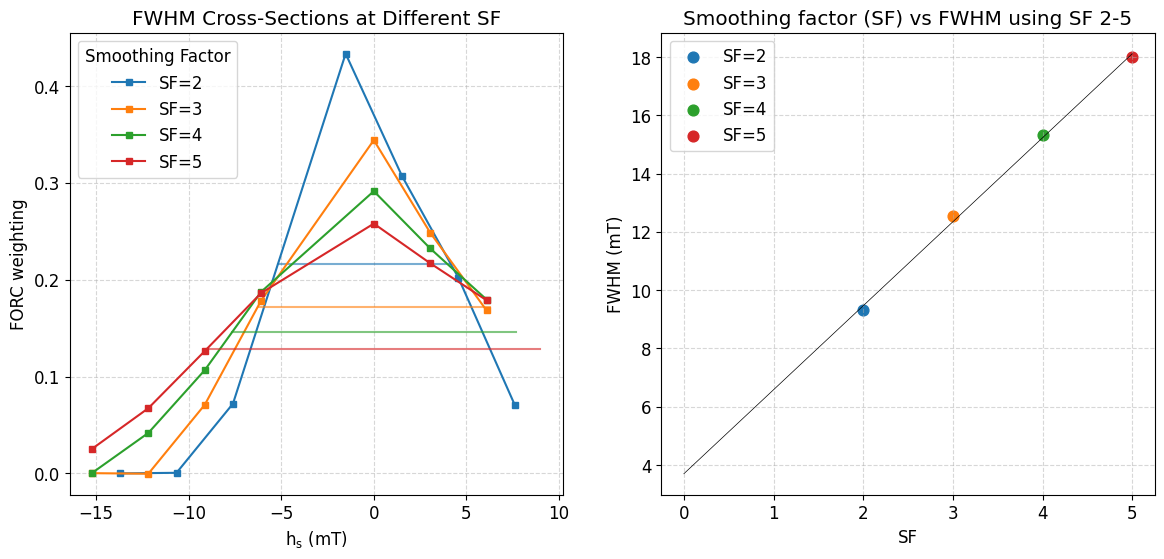

Are all of the FWHM reliable? Enter Y or N: Y
Input the lowest reliable SF from the FWHM graph above:2


/Users/kellybaker/Documents/MSci Code/adrians_trm_model/all_data/HC6/Manual_NRF_functions.py:1657: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


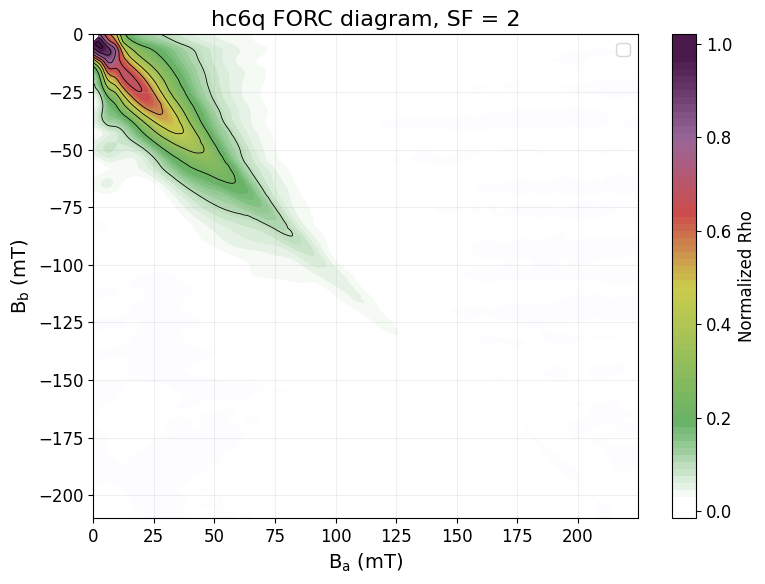

In [ ]:
X = pf.find_plot_fwhm(X) # creates FWHM plot for different smoothing factors
X = pf.check_fwhm(X) # checks sf reliability and allows user to change
X = pf.pick_SF(X) # choose scale factor for the forc distribution
X = pf.divide_mu0(X) # processig for forc
X = pf.sym_norm_forcs(X) # processig for forc
pf.norm_rho_all(X) # processig for forc
pf.inter_FORC_for_plot(X, X['SF']) # processig for forc
pf.plot_sample_FORC(X['xia'], X['yia'], X['zia'], X['SF'], X['name'],X['hcmaxa'],X['himina']) # plot forc
X = pf.user_input(X) # check forc boundaries and values

The next section will model TRM acquistion and use the NRM, ARM and SIRM data to calculate the paleointensity estimates. This takes ~ 0.5 to 3 minutes. It will prompt you to enter the D field used for ARM, and assumes 100mT for the A field as per demagnetisation.

In [ ]:
start = time.time() # time checker
thread = pf.ElapsedTimeThread()
thread.start()
X, V = pf.TRM_acq_w_arm(X, V) # data simulator
time.sleep(1)
thread.stop()
thread.join()
print() 
print("Finished in {:.3f} seconds".format(time.time()-start))



The model has calculated a paleointesnity estimate for each AF step, the central plots are the SIRM/ARM checks. Where these checks are out of bounds the palaeoitensity estimate is not reliable, marked by above the respective straight lines. 


The palaeointensity estiamte for this run of the sample will be appended to the results files paleo_results.dat. The figure below with the estiamtes and checks will be saved as PI_restults_samplename.svg inside the folder sample_samplename_V_samplerun. The raw data will be saved in the files inside a folder dedicated to this run of this specific sample full_data_sample_samplename_run_samplerun.dat inside sample_samplename_V_samplerun. 

In [ ]:
X, V = pf.calc_PI_checks_SIRM(V, X)
pf.fin_pal_SIRM_auto(X, V) 



In [ ]:
X, V = pf.calc_PI_checks_ARM(V, X)
pf.fin_pal_ARM_auto(X, V)

In [ ]:
pf.write_out_data(X, V)

In [ ]:
X.clear()
V.clear()